# <span style="color:green">     <font size="8"> A New Business Opportunity

<img style="float: right; margin: auto;" src="https://www.ambulante.org/wp-content/uploads/2019/03/logos_web_Jalisco_ITESOJesuita.png" width="350" height="220" />

<span style="color:green"> <font size="4">  *Simulación de Procesos Financieros: Proyecto I*

<b> <p style = "font-family: Palatino; font-size:2em; color: green;" > Daphne Hernández | Paloma Martínez | Oscar Flores </p> <b/>

In [1]:
%run Funciones.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from wordcloud import WordCloud
import seaborn as sns
from scipy import optimize
import statsmodels.api as sm 

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: center; text-align: center; justify-content: center; } </style> """))

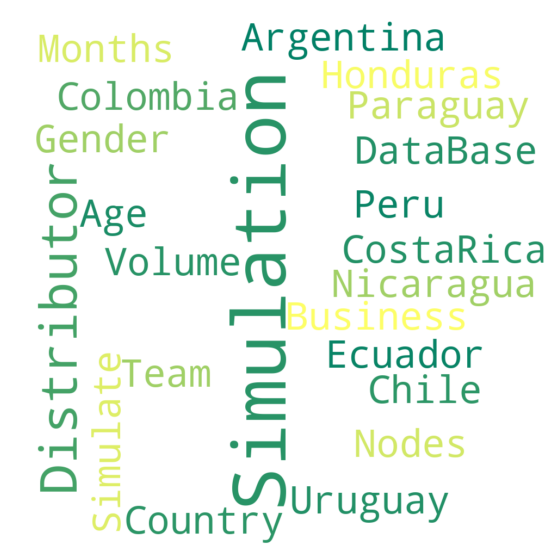

In [2]:
text=("DataBase Months Nodes Simulate Simulation Simulation Argentina Ecuador Colombia CostaRica Nicaragua Honduras Peru Paraguay Uruguay Chile Gender Age Distributor Distributor Team Volume Business Country Simulation simulation Simulation")

wordcloud = WordCloud(width=1000, height=1000, margin=0, colormap="summer", background_color="white").generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  Este proyecto se basa en el análisis de datos obtenidos por las ventas de una compañía de productos relacionados con la nutrición, el control de peso, las dietas deportivas y el cuidado personal. Además, se buscará encontrar el comportamiento de las nuevas personas, que se encuentren en situación similar a alguna que ya existe en el negocio. </p>
    
### 1.2 Objetivos:

> #### 1.2.1 Objetivo General:
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> Analizar el comportamiento y compra de producto de los nuevos distribuidores en sus siguientes tres meses en base al comportamiento de los distribuidores ya existentes. </p>
>
> #### 1.2.2 Objetivos específicos:
>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;">  * De acuerdo a cada país, realizar una comparación de su productividad total. </p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Separar el volumen total de acuerdo al género del distribuidor.</p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Analizar las diferencias de comportamiento de acuerdo a la edad del distribuidor.</p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Dependiendo de su equipo, examinar las compras de los distribuidores. </p>

### 1.3 Definición del problema:

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  Para meterlos un poco en contexto, Herbalife es una compañía de venta directa establecida a nivel global, proporcionan productos innovadores nutricionales con respaldo científico. Actualmente cubren clientes en alrededor de 90 países. Ofrecen también una oportunidad de negocio individual. El problema principal que tiene esta empresa Herbalife es que no tienen idea de como se van a comportar sus ventas en un futuro. Sus ventas son tan volátiles y abarcan tanto mercado en el mundo, que no han logrado definir en que país se vende más, o cual es el perfil de vendedor ideal para poderse enfocar más en ellos. Cuando investigamos sobre esta empresa multinivel nos dimos cuenta que querían aumentar sus ventas en línea impulsando el e-commerce e invirtiendo en las redes sociales. Concluimos que para hacer esto, la empresa tiene que tener muy definido su nicho de mercado y sus países líderes para no querer acaparar al mundo entero. Si Herbalife quiere invertir en el e-commerce nosotros les podremos ayudar a modelar sus ganancias para ver cuanto dinero podrían invertir en esta área, así como en otras y principalmente, obvservar el comportamiento de los distribuidores que entren al negocio, y simular su comportamiento y encontrar su máximo desempeño, dependiendo de la información de los distribuidores con características similares.

### 1.4 Nodos y Variables a simular

<p style = "font-family: Calibri Light; font-size:1.2em;color:black;"> Dentro de nuestra base de datos, encontramos 4 nodos a simular:
    
   * El país donde se encontrará registrado el distribuidor
   * El género del distribuidor
   * La edad del distribuidor en tiempo 0
   * El equipo del distribuidor (mientras mejor equipo, más beneficios se obtienen)
   * Los puntos de compra del distribuidor.

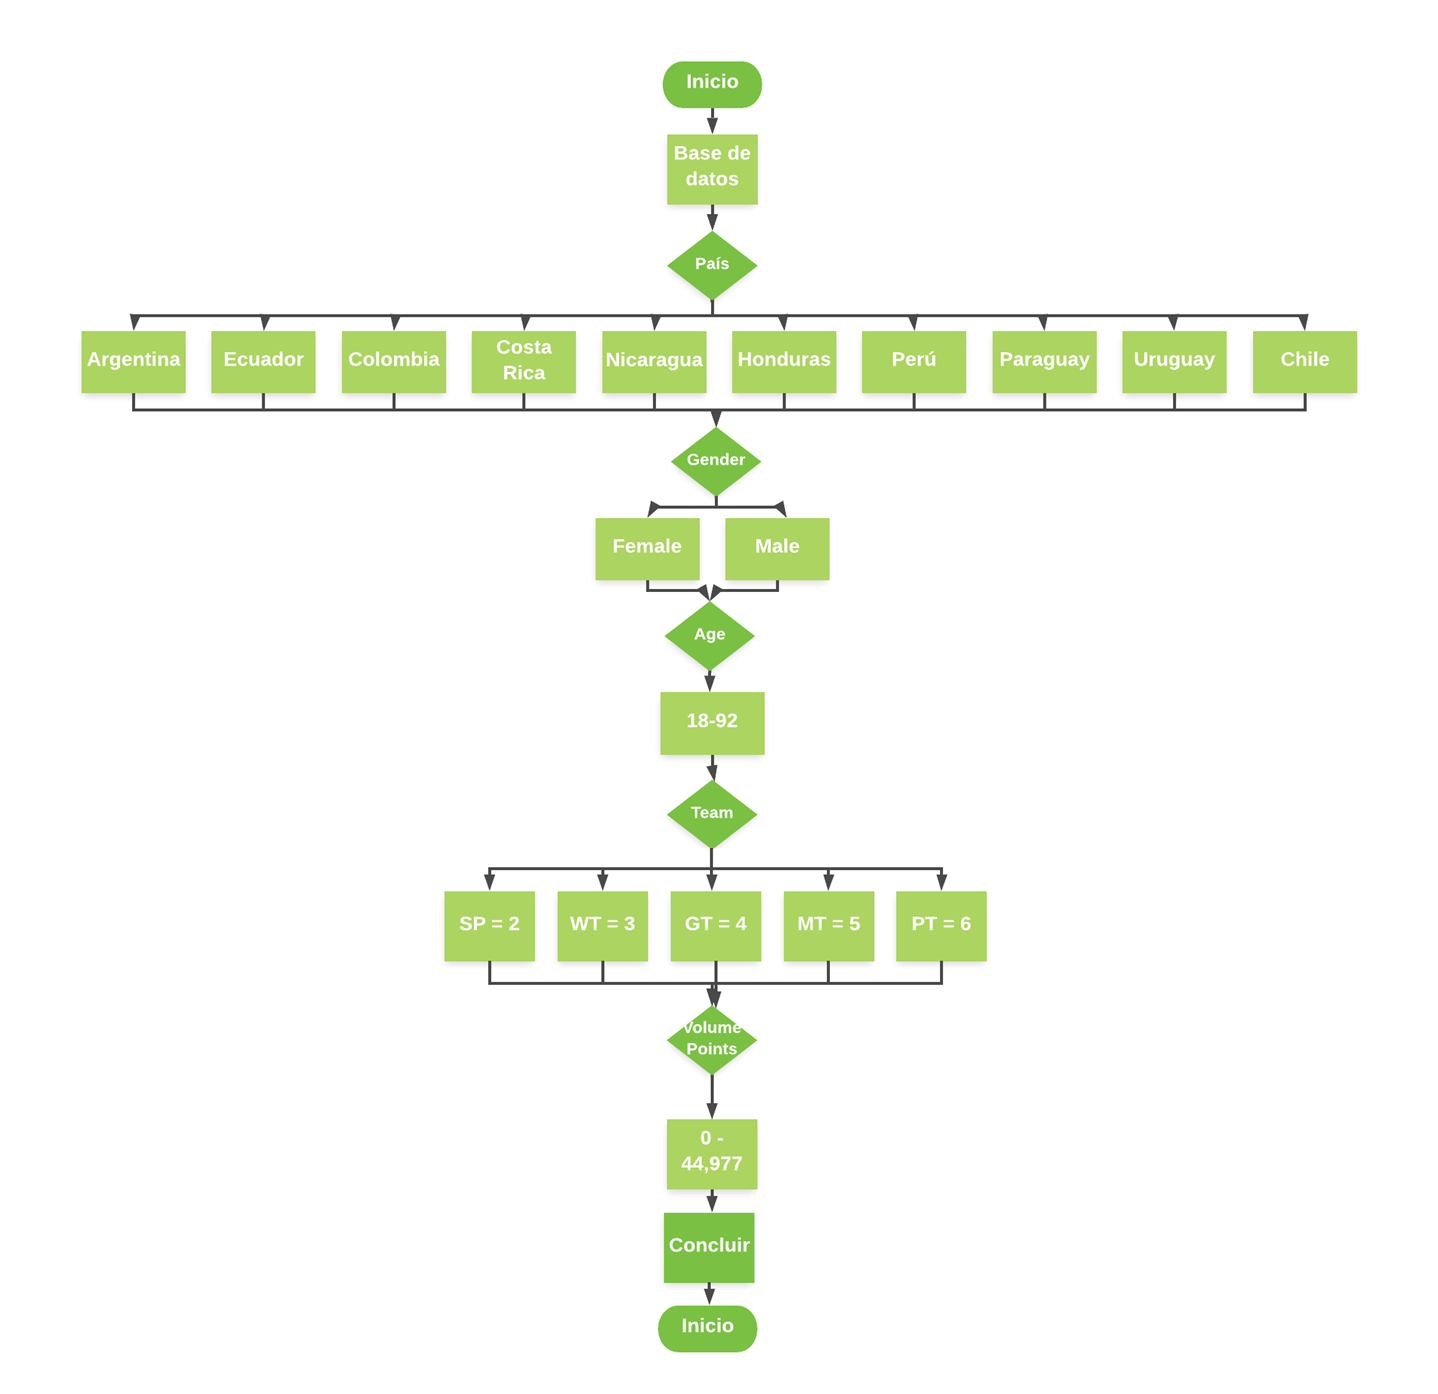

### 1.6 Obtención de la base de datos

In [3]:
DB = pd.read_excel("Base de Datos.xlsx")
DB

,Distributor,Age,Gender,Country,Team,October,November,December
0,1,46,Male,Colombia,PT,2828.11,3116.15,5573.25
1,2,49,Male,Colombia,GT,5003.90,3515.00,5972.60
2,3,55,Female,Colombia,PT,2627.95,2509.50,2537.75
3,4,24,Female,Ecuador,SP,23.95,280.65,254.95
4,5,58,Female,Chile,MT,2507.65,2507.80,2506.65
...,...,...,...,...,...,...,...,...
12353,12354,33,Female,Uruguay,SP,667.25,461.00,613.25
12354,12355,54,Female,Uruguay,SP,1095.70,1640.30,2514.35
12355,12356,41,Male,Uruguay,GT,8011.15,2547.65,2587.85
12356,12357,30,Male,Uruguay,SP,0.00,346.80,62.85


In [4]:
DB.infer_objects()
DB.dtypes

Distributor      int64
Age              int64
Gender          object
Country         object
Team            object
October        float64
November       float64
December       float64
dtype: object

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  Se puede observar que la base de datos contiene datos cuantitativos, como la edad, o los puntos de volumen comprados por cada distribuidor, pero también existen datos caulitativos como el género, el país o el equipo, por lo que vamos a convertir los datos a cuantitativos: </p>
    
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  El equipo quedará de la siguiente forma: </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * SP -> 2 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * WT -> 3 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * GT -> 4 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * MT -> 5 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * PT -> 6 </p>

> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  El género quedará de la siguiente forma: </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Female -> 0 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Male -> 1 </p>

> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  El país quedará de la siguiente forma: </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Argentina -> 1 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Colombia -> 2 </p> 
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Peru -> 3 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Chile -> 4 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Ecuador  -> 5 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Honduras -> 6 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Costa Rica -> 7 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Nicaragua -> 8 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Paraguay -> 9 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Uruguay -> 10 </p>

In [5]:
text_to_num = {"Team": {"SP": 2, "WT": 3, "GT": 4, "MT": 5, "PT": 6},
                "Gender": {"Female": 0, "Male": 1},
                "Country": {"Argentina": 1, "Ecuador": 5, "Colombia": 2, "Costa Rica": 7,
                           "Nicaragua": 8, "Honduras": 6, "Peru": 3, "Paraguay": 9, "Uruguay": 10,
                           "Chile": 4}}
DB.replace(text_to_num, inplace=True)

In [6]:
DB

,Distributor,Age,Gender,Country,Team,October,November,December
0,1,46,1,2,6,2828.11,3116.15,5573.25
1,2,49,1,2,4,5003.90,3515.00,5972.60
2,3,55,0,2,6,2627.95,2509.50,2537.75
3,4,24,0,5,2,23.95,280.65,254.95
4,5,58,0,4,5,2507.65,2507.80,2506.65
...,...,...,...,...,...,...,...,...
12353,12354,33,0,10,2,667.25,461.00,613.25
12354,12355,54,0,10,2,1095.70,1640.30,2514.35
12355,12356,41,1,10,4,8011.15,2547.65,2587.85
12356,12357,30,1,10,2,0.00,346.80,62.85


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Calulamos el total de volumen de cada distribuidor:  </p>

In [7]:
DB['Total TV'] = DB.October + DB.November + DB.December
DB

,Distributor,Age,Gender,Country,Team,October,November,December,Total TV
0,1,46,1,2,6,2828.11,3116.15,5573.25,11517.51
1,2,49,1,2,4,5003.90,3515.00,5972.60,14491.50
2,3,55,0,2,6,2627.95,2509.50,2537.75,7675.20
3,4,24,0,5,2,23.95,280.65,254.95,559.55
4,5,58,0,4,5,2507.65,2507.80,2506.65,7522.10
...,...,...,...,...,...,...,...,...,...
12353,12354,33,0,10,2,667.25,461.00,613.25,1741.50
12354,12355,54,0,10,2,1095.70,1640.30,2514.35,5250.35
12355,12356,41,1,10,4,8011.15,2547.65,2587.85,13146.65
12356,12357,30,1,10,2,0.00,346.80,62.85,409.65


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Así, una vez con todas las columnas cuantitativas, se puede obtener la descripción completa de la base de datos a analizar:  </p>

In [8]:
round(DB.describe(),2)

,Distributor,Age,Gender,Country,Team,October,November,December,Total TV
count,12358.00,12358.00,12358.00,12358.00,12358.00,11512.00,11917.00,12255.00,11418.00
mean,6179.50,39.63,0.29,2.97,2.33,692.70,639.44,669.68,2083.56
std,3567.59,12.30,0.45,1.45,0.57,1117.02,1101.73,1109.35,3017.81
min,1.00,18.00,0.00,1.00,2.00,0.00,0.00,-196.50,0.00
25%,3090.25,30.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00
50%,6179.50,38.00,0.00,3.00,2.00,238.00,201.90,217.75,1021.15
75%,9268.75,48.00,1.00,4.00,3.00,913.79,807.85,868.25,2787.95
max,12358.00,90.00,1.00,10.00,6.00,16249.80,21293.50,16225.37,39034.60


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Como observamos, faltan algunos datos, que los vamos a rellenar con 0:  </p>

In [9]:
DB = DB.fillna(0)

In [10]:
round(DB.describe(),2)

,Distributor,Age,Gender,Country,Team,October,November,December,Total TV
count,12358.00,12358.00,12358.00,12358.00,12358.00,12358.00,12358.00,12358.00,12358.00
mean,6179.50,39.63,0.29,2.97,2.33,645.28,616.62,664.10,1925.08
std,3567.59,12.30,0.45,1.45,0.57,1092.21,1088.38,1106.39,2952.88
min,1.00,18.00,0.00,1.00,2.00,0.00,0.00,-196.50,0.00
25%,3090.25,30.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00
50%,6179.50,38.00,0.00,3.00,2.00,161.65,165.08,208.25,829.58
75%,9268.75,48.00,1.00,4.00,3.00,828.22,770.76,859.22,2559.82
max,12358.00,90.00,1.00,10.00,6.00,16249.80,21293.50,16225.37,39034.60


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Para un poco más de practicidad en el manejo de los datos obtenidos, se van a separar por nodos, para después simplemente llamar el nodo deseado:  </p>

In [11]:
#Separar los datos por nodos
# 1) País
pais = DB.iloc[:,3]

# 2) Género
sexo = DB.iloc[:,2]

# 3) Edad
edad = DB.iloc[:,1]

# 4) Equipo
equipo = DB.iloc[:,4]

# 5) Volume Points
VP = DB.iloc[:,8]

nodes = [pais, sexo, edad, equipo, VP]

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Con este proyecto, se quiere obtener el perfil de las siguiente 20 personas que entren al negocio:  </p>

In [12]:
n = 20
ind = len(DB)
sim = pd.DataFrame(index = np.arange(ind,ind+n), columns = DB.columns)
sim = sim.drop(columns=['October', 'November', 'December'])
sim.Distributor = sim.index
sim

,Distributor,Age,Gender,Country,Team,Total TV
12358,12358,NaN,NaN,NaN,NaN,NaN
12359,12359,NaN,NaN,NaN,NaN,NaN
12360,12360,NaN,NaN,NaN,NaN,NaN
12361,12361,NaN,NaN,NaN,NaN,NaN
12362,12362,NaN,NaN,NaN,NaN,NaN
12363,12363,NaN,NaN,NaN,NaN,NaN
12364,12364,NaN,NaN,NaN,NaN,NaN
12365,12365,NaN,NaN,NaN,NaN,NaN
12366,12366,NaN,NaN,NaN,NaN,NaN
12367,12367,NaN,NaN,NaN,NaN,NaN


***
## Primer Nodo: País

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> El primer nodo a simular, será cuál es el país donde hay más distribuidores:  </p> 

In [13]:
n1 = nodes[0]
n1

0         2
1         2
2         2
3         5
4         4
         ..
12353    10
12354    10
12355    10
12356    10
12357    10
Name: Country, Length: 12358, dtype: int64

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Haremos un histograma para revisar como se comporta la distribución: </p>

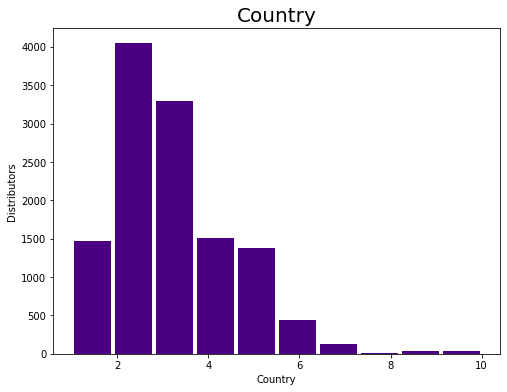

In [14]:
c = 'indigo'
fig1, ax1 = plt.subplots(figsize=(8,6))
lis = ax1.hist(n1,color=c,rwidth=0.9)
ax1.set_title("Country", size = 20)
ax1.set_xlabel("Country: Distribution")
ax1.set_ylabel("Distributors")
plt.ylabel('Distributors')
plt.xlabel('Country')
plt.show()

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Además, realizaremos la gráfica de caja para observar donde se encuentran los cuartiles y la media de nuestro nodo: </p>

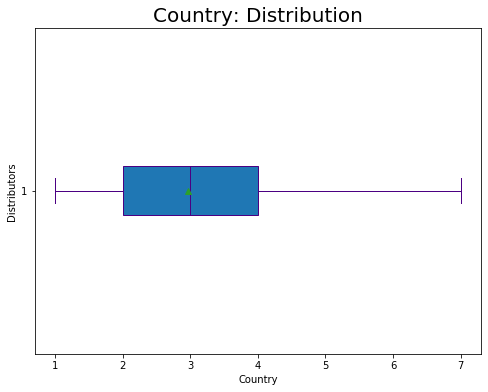

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot(n1, vert=False, showfliers=False, showmeans=True, boxprops=dict(color=c),
           patch_artist=True, capprops=dict(color=c),whiskerprops=dict(color=c),
            flierprops=dict(color=c), medianprops=dict(color=c))
ax.set_title("Country: Distribution", size=20)
ax.set_xlabel("Country")
ax.set_ylabel("Distributors")

plt.show()

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Obtendremos el kernel (usando la función de SKLearn) de nuestro nodo, para posteriormente realizar el método de aceptación y rechazo: </p>

In [16]:
x_grid = np.linspace(n1.min(),n1.max(),n1.max())
ker = kde_sklearn(n1,x_grid)

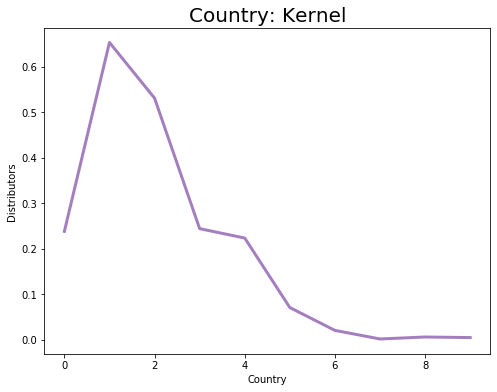

In [17]:
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(ker(x_grid), linewidth=3, alpha=0.5, color = c)
ax1.set_title("Country: Kernel", size = 20)
ax1.set_xlabel("Country")
ax1.set_ylabel("Distributors")
plt.ylabel('Distributors')
plt.xlabel('Country')
plt.show()

El máximo de f es: 0.6533927159615588


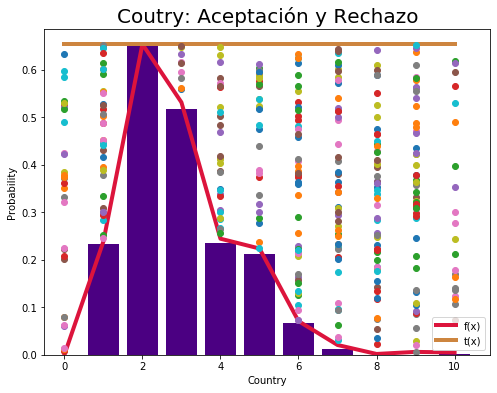

In [18]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
x = np.arange(0,n1.max()+1)  # Rango donde se graficará las funciones


# Función objetivo 
f =  ker

# Máximo de la función f
max_f =  max(ker(x))

# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.subplots(figsize=(8,6))
plt.title("Coutry: Aceptación y Rechazo", size = 20)
plt.xlabel("Country")
plt.ylabel("Probability")
plt.plot(f(x),label='f(x)', linewidth=4, color = 'crimson')
plt.plot(t(x),label='t(x)', linewidth =4, color = 'peru')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)

R2 = np.random.uniform(0,1,N)
R1 = np.round(np.random.uniform(0, 10, N),0)

acepto = Acep_rechazo(R2,R1,f,t)

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> A nuestra función de aceptación y rechazo, le agregamos que nos retorne un arreglo que nos da todos los valores que fueron aceptados: </p>

In [19]:
print(acepto)

[2.0, 2.0, 3.0, 2.0, 4.0, 5.0, 3.0, 3.0, 2.0, 3.0, 6.0, 4.0, 2.0, 4.0, 3.0, 5.0, 5.0, 5.0, 1.0, 2.0, 4.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 7.0, 3.0, 2.0, 10.0, 3.0, 5.0, 5.0, 5.0, 2.0, 1.0, 5.0, 3.0, 3.0, 5.0, 1.0, 2.0, 3.0, 2.0, 2.0, 5.0, 1.0, 3.0, 1.0, 4.0, 2.0, 2.0, 3.0, 7.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 6.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 5.0, 1.0, 3.0, 3.0, 2.0, 1.0, 2.0, 6.0, 1.0, 3.0, 2.0, 2.0, 5.0, 6.0, 4.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 6.0, 3.0, 7.0, 2.0, 2.0, 2.0, 5.0, 5.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 5.0, 1.0, 5.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 7.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 1.0, 1.0, 4.0, 1.0, 2.0, 5.0, 1.0, 2.0, 5.0, 5.0, 4.0]


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Este arreglo vamos a contar cada valor: </p>

In [20]:
uno = acepto.count(1)
dos = acepto.count(2)
tres = acepto.count(3)
cuatro = acepto.count(4)
cinco = acepto.count(5)
seis = acepto.count(6)
siete = acepto.count(7)
ocho = acepto.count(8)
nueve = acepto.count(9)
diez = acepto.count(10)

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Con la suma de estos valores, vamos a generar una tabla de probabilidad de cada valor, junto co nsu probabilidad acumulada: </p>

In [21]:
DF_cum = pd.DataFrame(index = np.arange(1,11))
DF_cum['country'] = DF_cum.index
DF_cum['count'] = uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez
DF_cum['prob'] = DF_cum['count']/sum(DF_cum['count'])
DF_cum['cumsum'] = np.cumsum(DF_cum['prob'])
DF_cum

,country,count,prob,cumsum
1,1,17,0.118056,0.118056
2,2,43,0.298611,0.416667
3,3,37,0.256944,0.673611
4,4,18,0.125000,0.798611
5,5,19,0.131944,0.930556
6,6,5,0.034722,0.965278
7,7,4,0.027778,0.993056
8,8,0,0.000000,0.993056
9,9,0,0.000000,0.993056
10,10,1,0.006944,1.000000


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Teniendo estas probabilidades de cada país, simplemente generamos números aleatorios con random.choice, ya que le vamos a pasar la probabilidad de cada país, para encotnrar a los siguiente 20 distribuidores:</p>

In [22]:
cont_sim = np.random.choice(np.arange(1, 11), p=DF_cum['prob'],size = 20)
cont_sim

array([4, 7, 3, 4, 3, 4, 2, 2, 2, 3, 2, 5, 1, 3, 6, 3, 5, 7, 1, 2])

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Y por último, simplemente lo agregamos a nuestro DataFrame que guarda la información de los siguientes 20 distribuidores: </p>


In [23]:
sim.Country = cont_sim
sim

,Distributor,Age,Gender,Country,Team,Total TV
12358,12358,NaN,NaN,4,NaN,NaN
12359,12359,NaN,NaN,7,NaN,NaN
12360,12360,NaN,NaN,3,NaN,NaN
12361,12361,NaN,NaN,4,NaN,NaN
12362,12362,NaN,NaN,3,NaN,NaN
12363,12363,NaN,NaN,4,NaN,NaN
12364,12364,NaN,NaN,2,NaN,NaN
12365,12365,NaN,NaN,2,NaN,NaN
12366,12366,NaN,NaN,2,NaN,NaN
12367,12367,NaN,NaN,3,NaN,NaN


***
## Segundo Nodo: Género

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> El segundo nodo a simular, será cuál es el género distribuidores:  </p> 

In [24]:
n2 = nodes[1]
n2

0        1
1        1
2        0
3        0
4        0
        ..
12353    0
12354    0
12355    1
12356    1
12357    0
Name: Gender, Length: 12358, dtype: int64

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Primero, vamos a encontrar los totales de cada género: </p>

In [25]:
male = sum(1 for x in n2 if x == 1)
female = sum(1 for x in n2 if x == 0)

gender = [male, female]
labels = ['male', 'female']
colors =['mediumblue','deeppink']
pos = np.arange(len(gender))
male, female

(3610, 8748)

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Con los totales ya obtenidos, realizamos una gráfica de pastel para observar el comportamiento de nuestro nodo: </p>

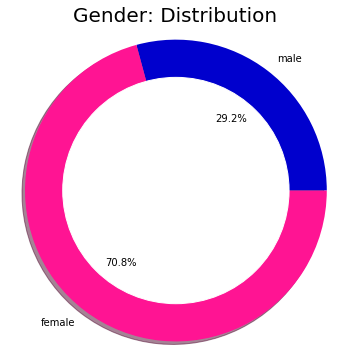

In [26]:
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(gender, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0, colors =colors)
my_circle=plt.Circle( (0,0), 0.75, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax1.axis('equal')
ax1.set_title("Gender: Distribution", size = 20)
plt.show()

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Además, vamos a realizar una gráfica de barras para observarlo más claro: </p>

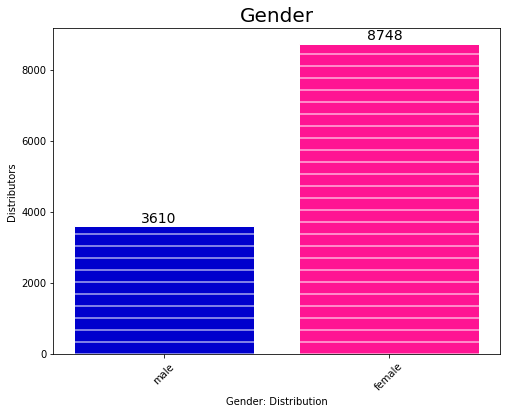

In [27]:
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(pos, gender, color = (colors[0],colors[1]), hatch=("-"), edgecolor='white')
ax1.set_title("Gender", size = 20)
ax1.set_xlabel("Gender: Distribution")
ax1.set_ylabel("Distributors")
plt.xticks(pos, labels, rotation = 45)
 
[plt.text(x = pos[i]-0.1 , y = gender[i]+100, s = gender[i], size = 14) for i in range(0,len(pos))]

plt.show()

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Al ser solo dos valores posibles, podemos decir que este nodo sigue la distribución de Bernoulli. </p> 

   \begin{equation}
     \label{eq:aqui-le-mostramos-como-hacerle-la-llave-grande}
     f(x) = \left\{
	       \begin{array}{ll}
		 p & \mathrm{si\ } x = 1 \\
		 q = 1-p & \mathrm{si\ } x = 0
	       \end{array}
	     \right.
   \end{equation}

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> para obtener el valor de $p$, es sacar la probabilidad de que el distribuidor sea de Estados Unidos: $ p =  \frac{male}{ total} $ y el valor de $q$ es simplemente $1-p$</p> 

In [28]:
#Obtener el valor de p:

p = male/len(n2)
q = 1-p
print("El valor de p es:", round(p,3), "o", round(p*100,2), "%")
print("El valor de q es:", round(q,3), "o", round(q*100,2), "%")

El valor de p es: 0.292 o 29.21 %
El valor de q es: 0.708 o 70.79 %


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Después, vamos a graficar la distribución de Bernoulli de nuestro nodo: </p> 

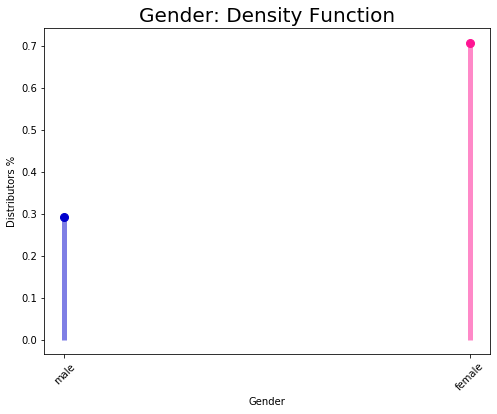

In [29]:
fig1, ax1 = plt.subplots(figsize=(8,6))
x = np.arange(stats.bernoulli.ppf(0.01, p),stats.bernoulli.ppf(0.99, p))
ax1.plot(x+1, stats.bernoulli.pmf(x, p), 'o', color=colors[1], ms=8)
ax1.plot(x, stats.bernoulli.pmf(x, q), 'o',color=colors[0], ms=8)
ax1.vlines(x+1, 0, stats.bernoulli.pmf(x, p), colors=colors[1], lw=5, alpha=0.5)
ax1.vlines(x, 0, stats.bernoulli.pmf(x, q), colors=colors[0], lw=5, alpha=0.5)
ax1.set_title("Gender: Density Function", size = 20)
ax1.set_xlabel("Gender")
ax1.set_ylabel("Distributors %")
plt.xticks(pos, labels, rotation = 45)
plt.show()

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es Bernoulli con $p$ y $1-p$

> $H_a$: los datos no se distribuyen Bernoulli

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Para comprobar nuestro valor de p, vamos a realizar la prueba de máxima verosimiltud, donde: </p> 

Supongamos $X_1,...X_n\sim Bernoulli(p)$. La función de densidad correspondiente es $p(x;p)=p^x(1−p)^{1−x}$, por lo que:
$$
\mathcal{L}(p)=\prod_{i=1}^n p(x_i;p)=\prod_{i=1}^n p^{x_i}(1-p)^{1-x_i}=p^{\sum x_i}(1-p)^{n-\sum x_i}
$$
denotemos $S=\sum x_i$, entonces 
$$
\mathcal{l}(p)=S \log p + (n-S) \log (1-p)
$$

Encontremos su máxima verosimilitud:

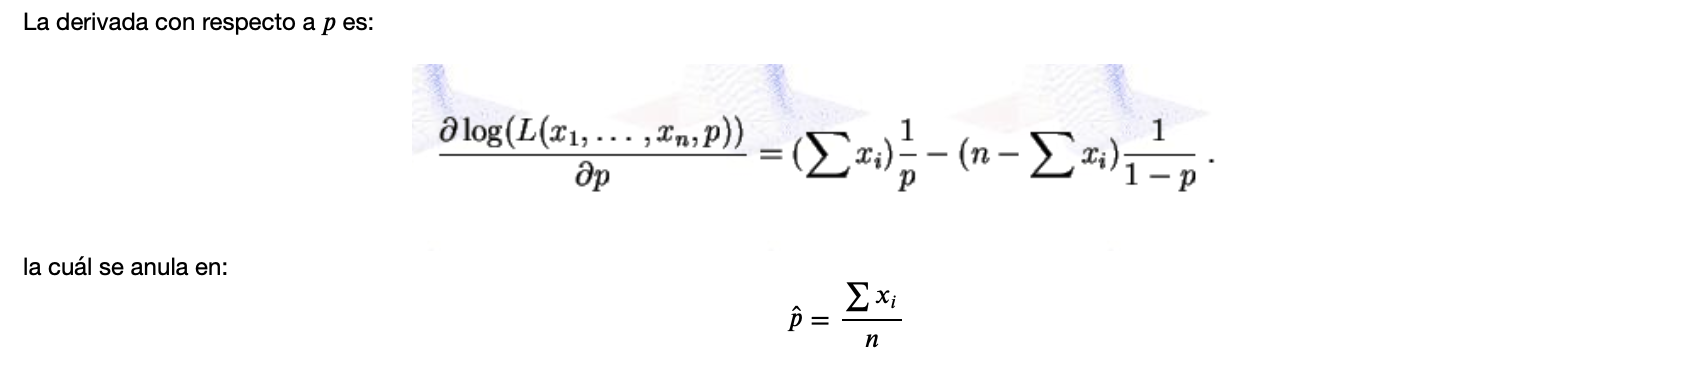

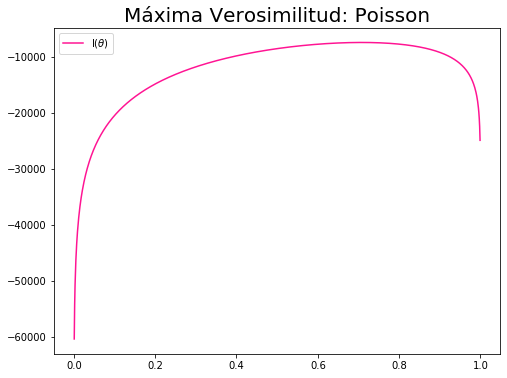

máximo $\theta$ de L($\theta$)= [0.]
máximo teorico = 0.7078815342288396


In [30]:
n = len(n2)
S = female
l = lambda theta: S*np.log(theta) + (n - S) * np.log(1-theta)
L = lambda theta: theta**S * (1-theta)**(n-S)
theta = np.arange(0.001,1,0.001)

plt.subplots(figsize=(8,6))
plt.title("Máxima Verosimilitud: Poisson", size = 20)
plt.plot(theta,l(theta),label= r'l($\theta$)', color=colors[1])
plt.legend()
plt.show()

max_L = optimize.fmin(lambda x:-L(x),0,disp=False)
print(r'máximo $\theta$ de L($\theta$)=', max_L)
max_teorico = S/n
print('máximo teorico =',max_teorico)

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Donde efectivamente, nuestro valor de p, es exactamente el mismo al máximo teórico de la máxima verosimitud, por lo que aceptamos nuestra $H_0$. </p> 

> **Conclusión**: No podemos rechazar la $H_0$ por lo tanto los datos distribuyen con la distribución Bernoulli.

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Con esto, ya podemos simular el género de las siguientes 20 personas: </p> 

In [31]:
gender_sim = np.random.binomial(1, p, 20)
gender_sim

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Y por último, simplemente lo agregamos a nuestro DataFrame que guarda la información de los siguientes 20 distribuidores: </p>



In [32]:
sim.Gender = gender_sim
sim

,Distributor,Age,Gender,Country,Team,Total TV
12358,12358,NaN,0,4,NaN,NaN
12359,12359,NaN,0,7,NaN,NaN
12360,12360,NaN,0,3,NaN,NaN
12361,12361,NaN,1,4,NaN,NaN
12362,12362,NaN,1,3,NaN,NaN
12363,12363,NaN,1,4,NaN,NaN
12364,12364,NaN,0,2,NaN,NaN
12365,12365,NaN,0,2,NaN,NaN
12366,12366,NaN,1,2,NaN,NaN
12367,12367,NaN,0,3,NaN,NaN


***
## Tercer Nodo: Edad

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> El tercer nodo a simular, será cuál es la edad distribuidores:  </p> 

In [33]:
n3 = nodes[2]
n3

0        46
1        49
2        55
3        24
4        58
         ..
12353    33
12354    54
12355    41
12356    30
12357    33
Name: Age, Length: 12358, dtype: int64

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Primero, como en todos los nodos, debemos graficar los datos, tanto su gráfica de caja, como su gráfica de barras, para poder crear hipótesis sobre su distribución: </p>

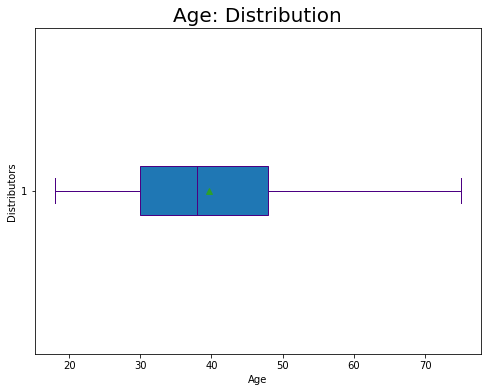

In [34]:
fig1, ax1 = plt.subplots(figsize=(8,6))

ax1.boxplot(n3, vert=False, showfliers=False, showmeans=True, boxprops=dict(color=c), patch_artist=True,
           capprops=dict(color=c),whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c), medianprops=dict(color=c))
ax1.set_title("Age: Distribution", size = 20)
ax1.set_xlabel("Age")
ax1.set_ylabel("Distributors")

plt.show()

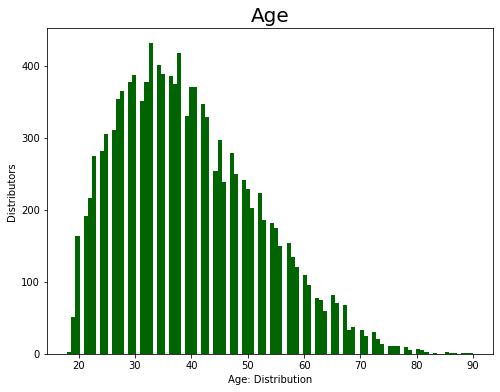

In [35]:
c = 'darkgreen'
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.hist(n3, bins=100, color = c)
ax1.set_title("Age", size = 20)
ax1.set_xlabel("Age: Distribution")
ax1.set_ylabel("Distributors")
plt.show()

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Observando esta gráfica podemos ver podría seguir una distribución Rice, que tiene su función de densidad de la siguiente manera: </p> 

\begin{equation} \label{eq1}
\begin{split}
f(x|\nu, \sigma) = \frac{x}{\sigma^2} exp(\frac{-(x^2+\nu^2)}{2\sigma^2})I_0(\frac{x\nu}{\sigma^2})
\end{split}
\end{equation}

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> La cual vamos a probar con el método de Cuantil-Cuantil: </p> 

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es Rice con media= $\mu$, desviación estándar = $\sigma$ y $\nu$ = 1.3

> $H_a$: los datos no se distribuyen Rice

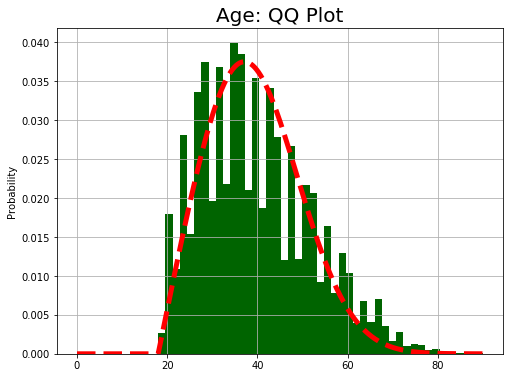

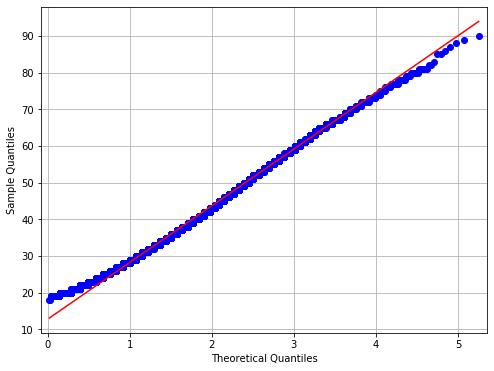

In [36]:
# Histograma de las variables creadas
mu = n3.mean()
sigma = n3.std()

plt.subplots(figsize=(8,6))
plt.hist(n3,bins=45,color = c, density=True)
x = np.arange(0,n3.max(),.01)
y = stats.rice.pdf(x, b=1.3, loc=n3.min(), scale=sigma)
plt.plot(x,y,'r--', linewidth=5)
plt.ylabel('Probability')
plt.title("Age: QQ Plot", size = 20)
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
# grap2 = st.probplot(measurements, dist="norm", plot=plt)
# grap1 = sm.qqplot(measurements, dist='norm',line='s')

fig1, ax1 = plt.subplots(figsize=(8,6))
grap1 = sm.qqplot(n3, dist=stats.rice(b=1.3),line='q', ax= ax1)
plt.grid()
# plt.xlabel('Normal theorical quantiles')
# plt.ylabel('Data theorical quantiles')
plt.show()

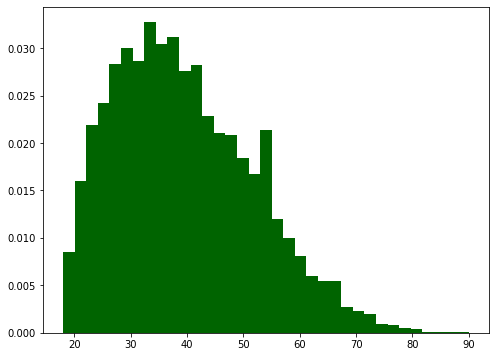

media mu =39.629552, desviación estándar muestral =12.298163


In [37]:
mu_real = mu; sigma_real = sigma
N = 45 # Cantidad de muestras
n = n3
J = N-10  # Cantidad de particiones del histograma

plt.subplots(figsize=(8,6))
[freq,x,p]=plt.hist(n,J,density=True, color = c)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral

print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

In [38]:
pi = stats.rice.pdf(x, 1.3)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = stats.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = stats.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mu,'\nDesviación estándar muestral = ',sigma)

Valor de chi cuadrado teorico  =  inf
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=inf, pvalue=0.0)
Estadístico de chi_cuadrado =  46.19425952027847
Media muestral =  39.62955170739602 
Desviación estándar muestral =  12.298162774026505


/Users/oscaralfonso/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/oscaralfonso/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Obvservamos que el valor de chi cuadrado es infinito, y el pvalue 0, por lo que: </p> 


> **Conclusión**: No podemos rechazar la $H_0$, por lo tanto los datos distribuyen con la distribución Rice.

In [39]:
age_mean = stats.rice.rvs(1.3, loc=n3.min(), scale=sigma, size=100000)
np.mean(age_mean)

39.289326457945776

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> La media de las edades de los distribuidores es de 39.27 años </p> 

In [40]:
age_sim = stats.rice.rvs(1.3, loc=n3.min(), scale=sigma, size=20)
age_sim

array([43.42420472, 46.22630895, 31.84039945, 35.90145233, 43.61216632,
       41.79849422, 43.66657437, 46.75726101, 35.92428584, 35.69786393,
       43.54008261, 44.94941454, 36.95598597, 41.98683021, 37.7527541 ,
       47.62889442, 33.68412991, 40.47771345, 26.63783592, 35.34223792])

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> La simulación de los siguientes 20 distribuidores queda de la siguiente manera: </p> 

In [41]:
sim.Age = np.round(age_sim,0)
sim

,Distributor,Age,Gender,Country,Team,Total TV
12358,12358,43.0,0,4,NaN,NaN
12359,12359,46.0,0,7,NaN,NaN
12360,12360,32.0,0,3,NaN,NaN
12361,12361,36.0,1,4,NaN,NaN
12362,12362,44.0,1,3,NaN,NaN
12363,12363,42.0,1,4,NaN,NaN
12364,12364,44.0,0,2,NaN,NaN
12365,12365,47.0,0,2,NaN,NaN
12366,12366,36.0,1,2,NaN,NaN
12367,12367,36.0,0,3,NaN,NaN


***

## Cuarto Nodo: Equipo

In [42]:
n4 = nodes[3]
n4

0        6
1        4
2        6
3        2
4        5
        ..
12353    2
12354    2
12355    4
12356    2
12357    3
Name: Team, Length: 12358, dtype: int64

(array([8733.,    0., 3230.,    0.,    0.,  316.,    0.,   57.,    0.,
          22.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <a list of 10 Patch objects>)

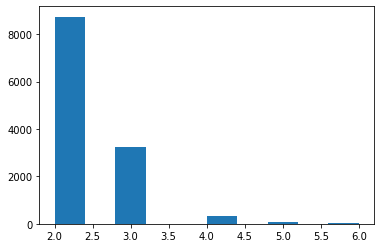

In [43]:
plt.hist(n4)

***
## Quinto Nodo: Volumen

In [44]:
n5 =nodes[4]
n5

0        11517.51
1        14491.50
2         7675.20
3          559.55
4         7522.10
           ...   
12353     1741.50
12354     5250.35
12355    13146.65
12356      409.65
12357       47.90
Name: Total TV, Length: 12358, dtype: float64

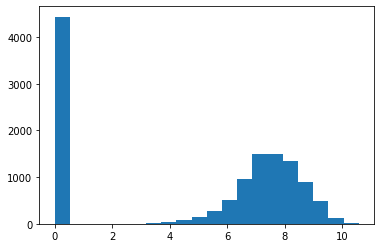

In [45]:
plt.hist(np.log(n5+1),bins=20)
plt.show()

***



## Conclusiones:

### Obtención de resultados:

In [46]:
sim.Team = sim.Team.apply(str)
sim.Gender = sim.Gender.apply(str)
sim.Country = sim.Country.apply(str)

sim.Team = sim.Team.replace("2", "SP")
sim.Team = sim.Team.replace("3", "WT")
sim.Team = sim.Team.replace("4", "GT")
sim.Team = sim.Team.replace("5", "MT")
sim.Team = sim.Team.replace("6", "PT")

sim.Gender = sim.Gender.replace("0", "Female")
sim.Gender = sim.Gender.replace("1", "Male")

sim.Country = sim.Country.replace("1", "Argentina")
sim.Country = sim.Country.replace("2", "Colombia")
sim.Country = sim.Country.replace("3", "Peru")
sim.Country = sim.Country.replace("4", "Chile")
sim.Country = sim.Country.replace("5", "Ecuador")
sim.Country = sim.Country.replace("6", "Honduras")
sim.Country = sim.Country.replace("7", "Costa Rica")
sim.Country = sim.Country.replace("8", "Nicaragua")
sim.Country = sim.Country.replace("9", "Paraguay")
sim.Country = sim.Country.replace("10", "Uruguay")

In [47]:
sim

,Distributor,Age,Gender,Country,Team,Total TV
12358,12358,43.0,Female,Chile,nan,NaN
12359,12359,46.0,Female,Costa Rica,nan,NaN
12360,12360,32.0,Female,Peru,nan,NaN
12361,12361,36.0,Male,Chile,nan,NaN
12362,12362,44.0,Male,Peru,nan,NaN
12363,12363,42.0,Male,Chile,nan,NaN
12364,12364,44.0,Female,Colombia,nan,NaN
12365,12365,47.0,Female,Colombia,nan,NaN
12366,12366,36.0,Male,Colombia,nan,NaN
12367,12367,36.0,Female,Peru,nan,NaN


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> El país que más se repite dentro de los distribuidores es: </p> 

In [50]:
stats.mode(sim.Country)

ModeResult(mode=array(['Colombia'], dtype=object), count=array([5]))

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> donde los países con más probabilidad son Colombia con un 35% o Perú con un 25%.</p> 

***

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> La moda del género de los distribuidores es: </p> 

In [48]:
stats.mode(sim.Gender)

ModeResult(mode=array(['Female'], dtype=object), count=array([15]))

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">por lo que predominan las mujeres, como lo hace también en la base de datos. </p> 

***

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> La edad promedio de los siguientes 20 distribuidores es de: </p> 

In [49]:
np.mean(sim.Age)

39.8

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> que es un valor cercano a lo obtenido en la prueba de chi cuadrada, de una media muestral de 39.62 años y una media de la simuación de 39.29 años. </p>

***